<a href="https://colab.research.google.com/github/Deeksha-Pandit/hello/blob/master/Quiz9/FinalCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U git+https://github.com/albu/albumentations


  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-x0e0p88e
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-x0e0p88e
     |████████████████████████████████| 634kB 5.0MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=c1dc1689cccf4c238953e2a1f44116a42722f71c443f986021cc2dbab4c23f52
  Stored in directory: /tmp/pip-ephem-wheel-cache-_djxl_jr/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=72306b286965280ba4185e657c8660df5ad99c01dc69123eaf7c593ac5f61a4f
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
  

In [2]:
import datetime 
datetime_object = datetime.datetime.now()
print(datetime_object)

2020-03-20 04:51:57.004640


In [3]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/Quiz9'
sys.path.append(folder)


In [0]:
%matplotlib inline
import torch
import train_test_loader
import show_images
import QuizDnn
import train_test
import evaluate
from Albumentationtransform import AlbumentationTransforms

In [0]:
import albumentations as A

channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)
train_transform = AlbumentationTransforms([
                                       A.Rotate((-30.0, 30.0)),
                                       A.HorizontalFlip(),
                                       #A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
                                       A.Normalize(mean=channel_means, std=channel_stdevs),
                                       A.Cutout(num_holes=1, max_h_size=16,max_w_size = 16,p=1) # fillvalue is 0 after normalizing as mean is 0
                                       ])
# Test Phase transformations
test_transform = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])


In [7]:
classes, trainloader, testloader = train_test_loader.load(train_transform,test_transform)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


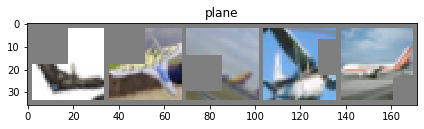

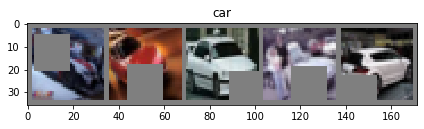

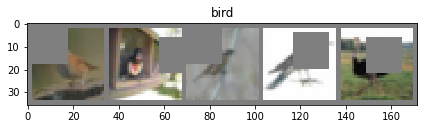

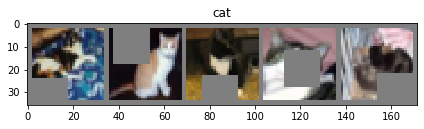

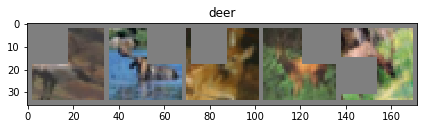

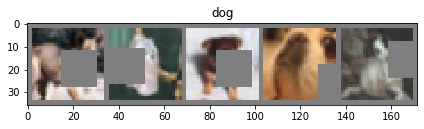

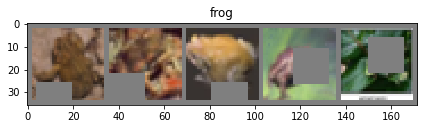

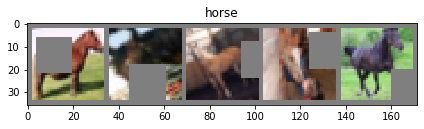

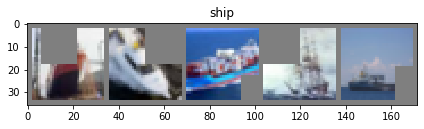

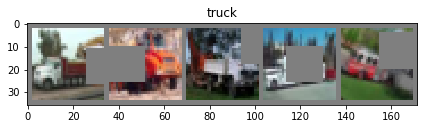

In [8]:
show_images.show_train_data(trainloader, classes)

In [12]:
# #import torch.nn as nn
# import torch.nn.functional as F


# class QuizDNN(nn.Module):
#     def __init__(self):
#         super(QuizDNN, self).__init__()

#         self.convblock1 = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.Dropout(p = 0.1),
            
#             )
#         self.convblock2 = nn.Sequential(
#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.Dropout(p = 0.1),
            
#             )

#         self.convblock3 = nn.Sequential(
#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.Dropout(p = 0.1),
            
#             )
#         self.convblock4 = nn.Sequential(
#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.Dropout(p = 0.1),
            
#             )
#         self.convblock5 = nn.Sequential(
#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.Dropout(p = 0.1),
            
#             )
#         self.convblock6 = nn.Sequential(
#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.Dropout(p = 0.1),
            
#             )
#         self.convblock7 = nn.Sequential(
#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.Dropout(p = 0.1),
            
#             )
#         self.convblock8 = nn.Sequential(
#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.Dropout(p = 0.1),
            
#             )
#         self.convblock9 = nn.Sequential(
#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False), #Rf = 3, j = 1
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.Dropout(p = 0.1),
            
#             )

#         self.pool = nn.MaxPool2d(2, 2)
#         self.gap = nn.Sequential(
#             nn.AdaptiveAvgPool2d(1)
#         )
            

#         self.fc =  nn.Conv2d(in_channels=64, out_channels=10, kernel_size=(1, 1), padding=0, bias=False)#Op_size = 1, 

      


#     def forward(self, x):

#         x1 = self.convblock1(x)
#         x2 = self.convblock2(x1)
#         x3 = self.convblock3(x1+x2)
#         x4 = self.pool(x1+x2+x3) 
#         x5 = self.convblock4(x4) 
#         x6 = self.convblock5(x4+x5)
#         x7 = self.convblock6(x4+x5+x6)
#         x8 = self.pool(x5+x6+x7) 
#         x9 = self.convblock7(x8)
#         x10 = self.convblock8(x8+x9)
#         x11 = self.convblock9(x8+x9+x10)
#         x12 = self.gap(x11)
#         x13 = self.fc(x12) 
#         x = x13.view(-1, 10)
      
#         return x

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = QuizDnn.QuizDNN().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
        MaxPool2d-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9,weight_decay=0.0005)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

In [14]:
testLoss = []
testAcc = []
EPOCHS = 20
best_acc1 = 10
for epoch in range(EPOCHS):
     print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
     train_test.train(model, device, trainloader, optimizer, criterion, epoch)
     scheduler.step()
     test_loss , test_acc = train_test.test(model, device, criterion, testloader)
   #  is_best = test_acc[-1] > best_acc1

   #  best_acc1 = max(test_acc[-1], best_acc1)
    #  save_checkpoint({
    #         'epoch': epoch + 1,
            
    #         'state_dict': model.state_dict(),
    #         'best_acc1': best_acc1,
    #         'optimizer' : optimizer.state_dict(),
    #     }, is_best)


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.1


Loss=1.314521074295044 Batch_id=390 Accuracy=44.05: 100%|██████████| 391/391 [00:18<00:00, 20.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0092, Accuracy: 5809/10000 (58.09%)

EPOCH: 2 LR: 0.1


Loss=1.1465308666229248 Batch_id=390 Accuracy=57.47: 100%|██████████| 391/391 [00:18<00:00, 20.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 6225/10000 (62.25%)

EPOCH: 3 LR: 0.1


Loss=0.9095413088798523 Batch_id=390 Accuracy=61.82: 100%|██████████| 391/391 [00:18<00:00, 20.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6900/10000 (69.00%)

EPOCH: 4 LR: 0.1


Loss=1.1633769273757935 Batch_id=390 Accuracy=65.32: 100%|██████████| 391/391 [00:18<00:00, 21.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7063/10000 (70.63%)

EPOCH: 5 LR: 0.1


Loss=0.8559242486953735 Batch_id=390 Accuracy=67.04: 100%|██████████| 391/391 [00:18<00:00, 20.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7019/10000 (70.19%)

EPOCH: 6 LR: 0.1


Loss=1.0040638446807861 Batch_id=390 Accuracy=68.01: 100%|██████████| 391/391 [00:18<00:00, 21.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7442/10000 (74.42%)

EPOCH: 7 LR: 0.1


Loss=1.0131911039352417 Batch_id=390 Accuracy=69.05: 100%|██████████| 391/391 [00:18<00:00, 21.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7421/10000 (74.21%)

EPOCH: 8 LR: 0.1


Loss=0.7695368528366089 Batch_id=390 Accuracy=69.72: 100%|██████████| 391/391 [00:18<00:00, 21.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7697/10000 (76.97%)

EPOCH: 9 LR: 0.1


Loss=0.669930636882782 Batch_id=390 Accuracy=70.49: 100%|██████████| 391/391 [00:18<00:00, 21.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7384/10000 (73.84%)

EPOCH: 10 LR: 0.1


Loss=0.918053150177002 Batch_id=390 Accuracy=70.94: 100%|██████████| 391/391 [00:18<00:00, 21.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7413/10000 (74.13%)

EPOCH: 11 LR: 0.1


Loss=0.7750688791275024 Batch_id=390 Accuracy=71.08: 100%|██████████| 391/391 [00:18<00:00, 21.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7538/10000 (75.38%)

EPOCH: 12 LR: 0.1


Loss=0.7072319388389587 Batch_id=390 Accuracy=71.55: 100%|██████████| 391/391 [00:18<00:00, 21.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7803/10000 (78.03%)

EPOCH: 13 LR: 0.1


Loss=0.5698341727256775 Batch_id=390 Accuracy=72.00: 100%|██████████| 391/391 [00:18<00:00, 21.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7734/10000 (77.34%)

EPOCH: 14 LR: 0.1


Loss=0.9019798040390015 Batch_id=390 Accuracy=71.91: 100%|██████████| 391/391 [00:18<00:00, 21.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7828/10000 (78.28%)

EPOCH: 15 LR: 0.1


Loss=0.9472168684005737 Batch_id=390 Accuracy=72.41: 100%|██████████| 391/391 [00:18<00:00, 21.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7885/10000 (78.85%)

EPOCH: 16 LR: 0.010000000000000002


Loss=0.6654406785964966 Batch_id=390 Accuracy=77.01: 100%|██████████| 391/391 [00:18<00:00, 21.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8453/10000 (84.53%)

EPOCH: 17 LR: 0.010000000000000002


Loss=0.6601617932319641 Batch_id=390 Accuracy=78.85: 100%|██████████| 391/391 [00:18<00:00, 21.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8524/10000 (85.24%)

EPOCH: 18 LR: 0.010000000000000002


Loss=0.4464382529258728 Batch_id=390 Accuracy=79.35: 100%|██████████| 391/391 [00:18<00:00, 21.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8590/10000 (85.90%)

EPOCH: 19 LR: 0.010000000000000002


Loss=0.6390723586082458 Batch_id=390 Accuracy=79.78: 100%|██████████| 391/391 [00:18<00:00, 21.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8590/10000 (85.90%)

EPOCH: 20 LR: 0.010000000000000002


Loss=0.5456205606460571 Batch_id=390 Accuracy=80.14: 100%|██████████| 391/391 [00:18<00:00, 21.48it/s]



Test set: Average loss: 0.0032, Accuracy: 8604/10000 (86.04%)



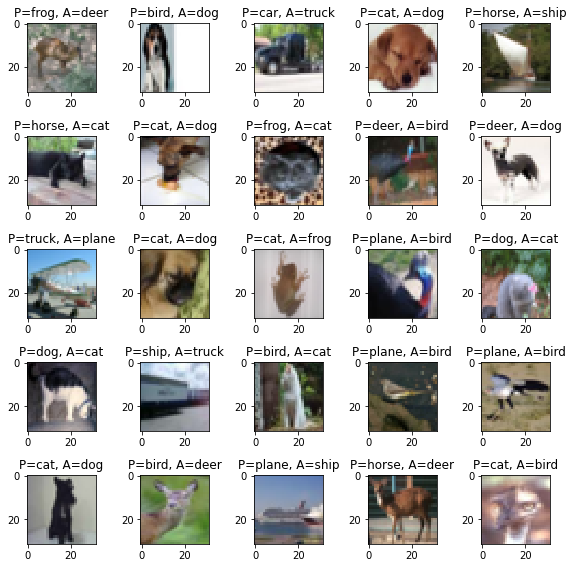

In [15]:
evaluate.show_misclassified_images(model, device, testloader, classes)

In [16]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 86 %


In [17]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 91 %
Accuracy of   car : 96 %
Accuracy of  bird : 79 %
Accuracy of   cat : 76 %
Accuracy of  deer : 83 %
Accuracy of   dog : 75 %
Accuracy of  frog : 88 %
Accuracy of horse : 87 %
Accuracy of  ship : 91 %
Accuracy of truck : 91 %


In [0]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20,10))

axs[0].plot(test_loss)
axs[0].set_title("Test Loss")


axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")



In [0]:
print(test_loss)

In [0]:
print(test_acc)

In [0]:
import shutil
def save_checkpoint(state, is_best, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
  #  if is_best:
   #     shutil.copyfile(filename, 'model_best.pth.tar')

In [0]:
len(test_acc)